### Inspired By the Great GOD Andrej Karapathy

### This is the Beginning of a new series where I will be coding the ML algos from scratch all the way from linear regression to Implementing Papers by My self.

### Implementing the Linear Models

### Starting from 20/12/23  - Linear Regression

The linear regression
![Screenshot from 2023-12-20 11-00-22.png](<attachment:Screenshot from 2023-12-20 11-00-22.png>)
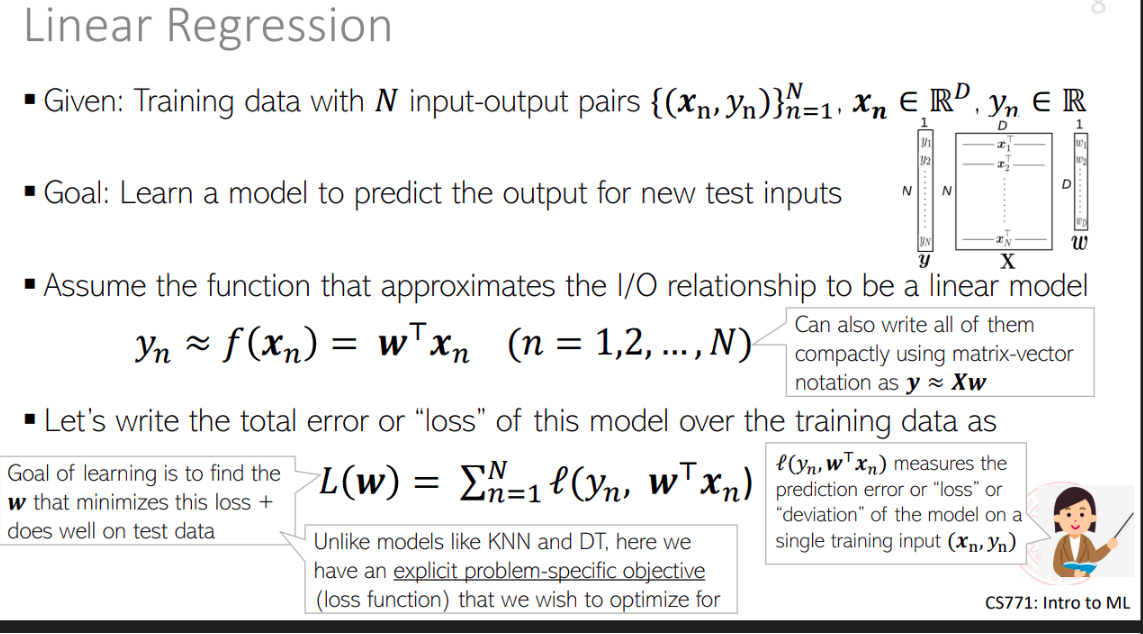

Regression Implies predicting the output or some constant value for a particular Input.
- Linear regression  - defines a linear relationship between the I/O .
- Y(output) = W(weight)*x(input) + b(bias)
- Define a Loss function i.e. Mean Squared Error Loss ; MSE = (y_a - y_p)**2
- optimize the loss to get the minimum losss and get the weights corresponding to it to prediction for the test data

We will start with 1d data and their predictions for simplicity and try to train our simple linear model over it.

In [322]:
import numpy as np
import matplotlib.pyplot as plt

In [323]:
# generate linear data points x and y // generating 100 points
X = np.linspace(0, 10, 100)
error = np.random.normal(0,1 ,100) # choosing deviation from the normal distributions and adding them to the X to get the Y.
Y = X + error # labels for our 1D data

In [324]:
print(X.shape) # represents a vector of size 100 rather than a matrix of size 100 X 1
X = X.reshape((100,1))
Y  = Y.reshape((100,1))
# X.T
print(" matrix array shape " ,Y.shape)


(100,)
 matrix array shape  (100, 1)


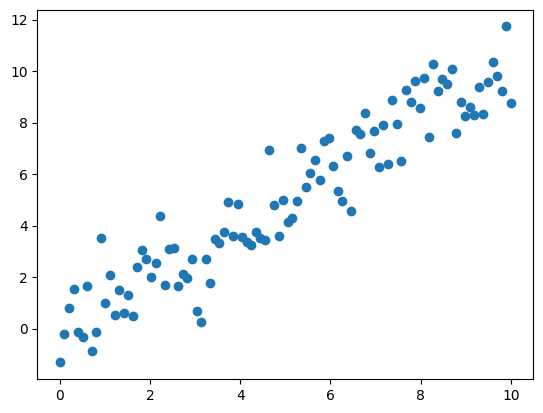

In [325]:
# Visualise the data points
plt.scatter(X , Y)

suppose we intialise the weights by 0 \
intial predictions ; y = w*x  = 0 for all   
so when we calculates loss by MSE  ;  l  = (y_a - y_p)^2   
so l = y_a**2  \
now we have to decrease the loss by updating the weights  
Q) how are we going to update the weights ?   
l = (y_a  - y_p) ^2 === This loss for a particular input  
= (y_a - wx)^2 = y_a^2 + (wx)^2 + 2(y_a)(wx)  
Now we will see by how much to change the w to get a small change in l !! ohh thats the derivative of L wrt W  
dL/dw = 2w(x^2) + 2(y_a)(x) = 2x(wx + y_a)   This is basically the backpropagation i.e. Updating the weights

- Lets first visualise the loss functions 

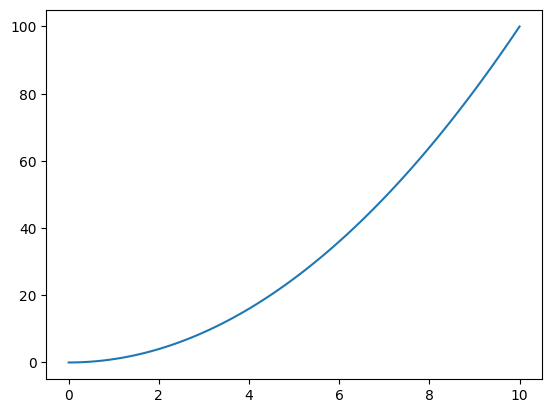

In [326]:
plt.plot(X , (X)**2)

code to update the w by gradient descent  
w = w - l(dL/dw)   ;

calculate dL/dw 
dL/dw = d((y_a - wx)^2)/dw = -2(y_a - wx)x : # hence we need to replace it in the above equations 

w  = w + 2l*x*(y_a - wx) ;  

wait this is the update for one w or one data point what will it be for all the data points  we have to automate it 


first define the Loss for the whole data-set as L  = sum(l) for all l belongs to all X ;  
L = sum((y_a - y_p)^2) 

in linear regression the outpout is a linear combination of the input features ;    
in our case we have in each input only one features and so there will be only one w corresponding for that feature.  

thats basically y_p = x*w just the scalar multiplication with the vector gives the output 



In [327]:
# intialization of the weights 
w = 0  ; 

In [328]:
Y_predict = w*X 
Y_predict.shape

(100, 1)

In [329]:
# print(Y[1] , " " , Y_predict[1], Y[1]*Y[1])
# print(w.shape)

In [330]:
np.sum((Y-Y_predict)**2)

3602.9924695938794

In [331]:
L_MSE = np.sum((Y - Y_predict)**2)  / 100
print("Loss for our data: " , L_MSE)

Loss for our data:  36.029924695938796


In [332]:
X.shape

(100, 1)

In [333]:
# D = X.T
# D.shape # bug here it doesn't get transpose for which we get wrong answer

In [334]:
print(X.T.shape , (Y - Y_predict).shape , (X.T@(Y-Y_predict)).shape)
# print(w.shape)

(1, 100) (100, 1) (1, 1)


In [335]:
# clubbing the gradient descent equation for all the data points 
l = 0.00001  # be very very carefull in choosing the right value it take me 1hr to figure out the bug
w  = w  + 2*l*(X.T)@(Y - Y_predict)

In [336]:
w

array([[0.0683783]])

In [337]:
# lets automate the process to converge ::
# intialising the w
w = 0 
for i in range(200):
    # forward pass code:
    Y_predict = w*X 
    L_MSE = np.sum((Y - Y_predict)**2)  / 100
    print(f"{i}th iteration : " , L_MSE)

    # Backward pass i.e Backpropagation 
    # clubbing the gradient descent equation for all the data points 
    l = 0.00001  # be very very carefull in choosing the right value it take me 1hr to figure out the bug
    w  = w  + 2*l*(X.T)@(Y - Y_predict)


0th iteration :  36.029924695938796
1th iteration :  31.51097291924465
2th iteration :  27.577303497848746
3th iteration :  24.15311225141215
4th iteration :  21.17241295105959
5th iteration :  18.577765724983063
6th iteration :  16.319170157496504
7th iteration :  14.353101750893194
8th iteration :  12.641673182145393
9th iteration :  11.151904191357097
10th iteration :  9.85508603228065
11th iteration :  8.726228237475455
12th iteration :  7.743577036940161
13th iteration :  6.888196149855007
14th iteration :  6.143601871038672
15th iteration :  5.4954454200156695
16th iteration :  4.931236431369444
17th iteration :  4.440102257873573
18th iteration :  4.012578448027435
19th iteration :  3.6404263603721163
20th iteration :  3.31647439990457
21th iteration :  3.0344798171200047
22th iteration :  2.789008406466793
23th iteration :  2.575329785930627
24th iteration :  2.3893262397223807
25th iteration :  2.2274133674133414
26th iteration :  2.086471010378856
27th iteration :  1.96378312

In [338]:
w # w is indeed is near to 1 which was expected 

array([[1.0205194]])

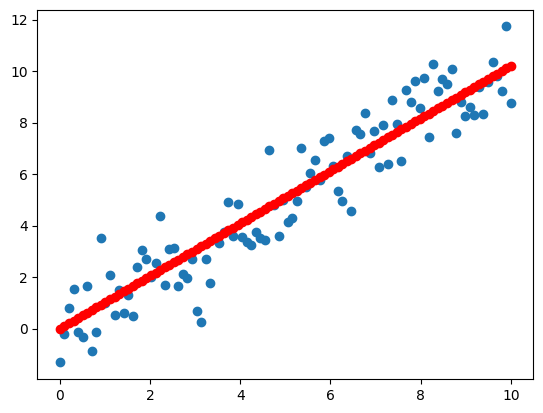

In [339]:
plt.scatter(X,Y)
plt.scatter(X, w*X , c = 'r') # visualising the regression line 
# plt.plot(Y_predict)

### Lets Now compare our result with the Linear algebra result

BY linear algebra the optimum weight vector is defined as 
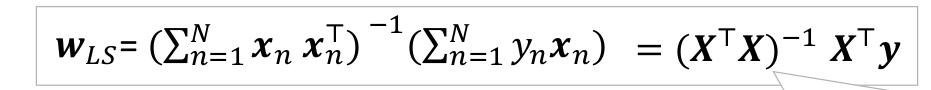

In [340]:
# lets calculate the weight 
W_ls = np.linalg.inv(X.T@X) @ X.T @ Y

In [341]:
print(f"The Optimum param by Linalgebra is {W_ls}")
print(f"The Optimum param by gradient descent is {w}")

The Optimum param by Linalgebra is [[1.02052036]]
The Optimum param by gradient descent is [[1.0205194]]
